# Deep Learning for Computer Vision (series)

## 02 - Building our first Neural Network





I'll teach you... 


- What's keras

- how to build your first ever neural network

- how to train the network

- how to test the network

- how to get predictions from the model


### 1) Import everything needed

In [47]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

| Theory time! |
|----|


**What's Keras?**

Keras is an interface that wraps many deep learning frameworks!

It run on the top of Tensorflow, Theano, and CNTK.

Keras is the official **High-level API** for tensorflow.

It's very user-friendly; 

it offers consistent & simple APIs, and enables fast experimentations;

You can run it on CPU and GPU both!

We'll be using tensorflow as a backend for Keras.



### 2) Hello world of deep learning 

In [48]:
digits_dataset = keras.datasets.mnist

Mnist - Collection of hand written digits 0-9

In [ ]:
training_dataset, testing_dataset = digits_dataset.load_data() 

In [49]:
(training_data, training_labels) = training_dataset

Because the network expects both data along with labels

In [50]:
(testing_data, testing_labels) = testing_dataset

So we could test the trained model

In [51]:
print("Total Training Images", len(training_data))

Total Training Images 60000


In [52]:
print("Total Testing Images", len(testing_data))

Total Testing Images 10000


In [53]:
print("Total Training Labels", len(training_labels))

Total Training Labels 60000


In [54]:
print("Total Testing Labels", len(testing_labels))

Total Testing Labels 10000


#### Display one of the images from dataset

In [56]:
import matplotlib.pyplot as plt

In [58]:
len(training_data)

60000

In [59]:
first_image = training_data[0]

#### What are the dimensions of our first image

In [60]:
print(first_image.shape)

(28, 28)


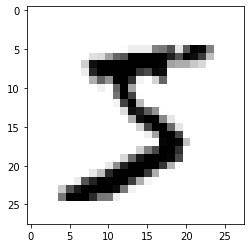

In [63]:
plt.imshow(first_image, cmap = plt.cm.binary)

### 3) Why do we scale the dataset?

- It's easier for the network to be trained on scalled dataset
- We can scale the data either b/w (0 and 1) or (-1 and +1) 

In [64]:
import numpy as np

In [65]:
first_image.max()

255

In [66]:
first_image.min()

0

In [67]:
from tensorflow.keras.utils import normalize

In [68]:
training_data = normalize(training_data)

In [ ]:
# ^ We also call these features

In [69]:
testing_data = normalize(testing_data)

In [70]:
first_image = training_data[0]

In [71]:
first_image.max()

0.8164604414256631

In [72]:
first_image.min()

0.0

| Theory time! |
|----|

**Do you know what's the difference b/w Feed-forward NN and Back-Propogation?**
- In Feed-forward NN, the input travel from input layers to output layers
- In back-propogation there are two steps

  - 1) Feed forward the values
  - 2) Calculate the error and propogate it to earlier layers
  
**Note: Forward-propogation is a part of back-propogation

### 4) Let's build the "model"

In [ ]:
model = Sequential()

model.add(Flatten())

# Input layer
model.add(Dense(128, activation='relu'))

# Hidden layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

# Think of layers as LEGO bricks of a neural network


#### Compile it

In [73]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

| Theory time! |
|:---|


#### What's an activation function and loss-function?

**Activation function**
- A simulation of a neuron trigger; a neuron may or may not fire
- The activation function of a neuron defines the output of that neuron given an input or set of inputs.

**Loss function**
- Loss function is something our model is trying to reduce while training
- Loss is calculated at the end of each Epoch
- An epoch is a single pass of your entire data through the network
 

**What function should I use?**

| Problem Type | Output Type |Activation Function | Loss Function |
| :--- | :--- | :--- | :--- |
| Regression | Numeric Value | Linear | Mean Squared Error (MSE)
| Classification | Binary Outcome | Sigmoid | Binary Cross Entropy
| Classification | Single Label, Multiple-Classes | Softmax | Cross Entropy
| Classification | Multiple Labels, Multiple-Classes | Sigmoid | Binary Cross Entropy


### 5) Training time!!!

In [74]:
model.fit(training_data, training_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0575 - accuracy: 0.9818
Epoch 2/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0432 - accuracy: 0.9865
Epoch 3/3
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0336 - accuracy: 0.9891


### 6) Evaluation time!!!

In [75]:
validation_loss, validation_accuracy = \
model.evaluate(testing_data, testing_labels)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.0873 - accuracy: 0.9772


#### Saving the model

In [76]:
model.save('first_ever_model.model')

INFO:tensorflow:Assets written to: first_ever_model.model/assets


In [77]:
from tensorflow.keras.models import load_model

In [78]:
model = load_model('first_ever_model.model')

### Predictions?

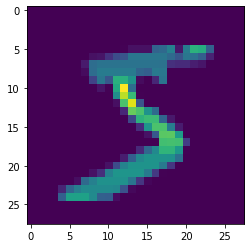

In [79]:
plt.imshow(first_image)

In [80]:
predictions = model.predict(training_data[:1])

In [81]:
predictions

array([[4.6788604e-13, 1.6401634e-11, 4.6772639e-09, 4.8055300e-03,
        6.5228864e-16, 9.9519449e-01, 8.9479574e-13, 3.1757875e-13,
        5.3640820e-10, 3.5733276e-08]], dtype=float32)

In [82]:
np.argmax(predictions)

5